# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [28]:
#!ls drive/'My Drive'/data/train_data.csv

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print('The Columns with their nan values counts are below ')
for col in project_data.columns:
    print('{col} '.format(col=col),project_data[col].isnull().sum())

The Columns with their nan values counts are below 
Unnamed: 0  0
id  0
teacher_id  0
teacher_prefix  3
school_state  0
project_submitted_datetime  0
project_grade_category  0
project_subject_categories  0
project_subject_subcategories  0
project_title  0
project_essay_1  0
project_essay_2  0
project_essay_3  105490
project_essay_4  105490
project_resource_summary  0
teacher_number_of_previously_posted_projects  0
project_is_approved  0


In [5]:
# removing 3 nan values from teacher prefix column as they seems to be outliers
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
project_data.dropna(subset=['teacher_prefix'],inplace=True)

In [6]:
#how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True) #0 for index and 1 for columns

#counting the occurence of word

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [9]:

cat_dict.items()

dict_items([('Math_Science', 41419), ('SpecialNeeds', 13642), ('Literacy_Language', 52236), ('AppliedLearning', 12135), ('History_Civics', 5914), ('Music_Arts', 10293), ('Health_Sports', 14223), ('Warmth', 1388), ('Care_Hunger', 1388)])

## 1.3 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [11]:
project_data['teacher_prefix'].unique()

array(['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Dr.'], dtype=object)

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.\r\nWe all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.\r\n       Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will al

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.  We all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.         Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will allow 

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Some of my students come from difficult family lives but they do not let that stop them We have built a community in our classroom that allows each student to be comfortable with who they are Even though we are a diverse school everyone feels included We have a high Hispanic population and about 90 of the students are on free or reduced price lunch Most students are living with a single parent or both parents work full time although many parents are eager to help in any way they can We all know how important it is to get kids up and moving I want my classroom to be a place where students can be active phyically and mentally The requested items will allow my students to move all day When they are sitting in a chair their movement is limited Kindergarten students have a hard time sitting still for long periods of time They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair Having these choices in my classroom will allow students to be active and 

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109245/109245 [01:30<00:00, 1209.95it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'students come difficult family lives not let stop built community classroom allows student comfortable even though diverse school everyone feels included high hispanic population 90 students free reduced price lunch students living single parent parents work full time although many parents eager help way know important get kids moving want classroom place students active phyically mentally requested items allow students move day sitting chair movement limited kindergarten students hard time sitting still long periods time would much rather bounce stability ball wiggle cushion sit hard chair choices classroom allow students active learn time choices classroom also build greater bond students learn choose seat best fits learning style hopefully able help classmates find seat works students move around room able work everyone instead one group day nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
# similarly you can preprocess the titles also
preprocessed_title = []

for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r',' ')
    sent = sent.replace('\\"',' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109245/109245 [00:03<00:00, 29150.81it/s]


## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### 1.5.3 Vectorizing Numerical features

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

#### Pandas Dataframe Reordering

Reordering the pandas dataframe with pre processed essays,title and relevant columns for classification

In [23]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [24]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [25]:
# https://stackoverflow.com/questions/45747589/copying-a-column-from-one-dataframe-to-another-gives-nan-values?rq=1

project_data_ = pd.DataFrame({c: project_data[c].to_numpy() for c in ('teacher_prefix','school_state','project_grade_category','clean_categories','clean_subcategories',\
                                                                     'teacher_number_of_previously_posted_projects','price')})
project_data_.head(3)



,teacher_prefix,school_state,project_grade_category,clean_categories,clean_subcategories,teacher_number_of_previously_posted_projects,price
0,Mrs.,CA,Grades PreK-2,Math_Science,AppliedSciences Health_LifeScience,53,725.05
1,Ms.,UT,Grades 3-5,SpecialNeeds,SpecialNeeds,4,213.03
2,Mrs.,CA,Grades PreK-2,Literacy_Language,Literacy,10,329.00


In [26]:
project_data_ = project_data_.assign(essay = preprocessed_essays,title = preprocessed_title,approved = project_data['project_is_approved'])
project_data_.head(3)

,teacher_prefix,school_state,project_grade_category,clean_categories,clean_subcategories,teacher_number_of_previously_posted_projects,price,essay,title,approved
0,Mrs.,CA,Grades PreK-2,Math_Science,AppliedSciences Health_LifeScience,53,725.05,fortunate enough use fairy tale stem kits clas...,engineering steam primary classroom,1
1,Ms.,UT,Grades 3-5,SpecialNeeds,SpecialNeeds,4,213.03,imagine 8 9 years old third grade classroom se...,sensory tools focus,1
2,Mrs.,CA,Grades PreK-2,Literacy_Language,Literacy,10,329.00,class 24 students comes diverse learners stude...,mobile learning mobile listening center,1


#### Creating the dataframe for new features first.

In [27]:
# Before splitting model let's check if dataset is balanced or not.
print("Negative reviews count = ",np.sum(project_data_.approved==0))
print("positive reviews count = ",np.sum(project_data_.approved==1))

Negative reviews count =  16542
positive reviews count =  92703


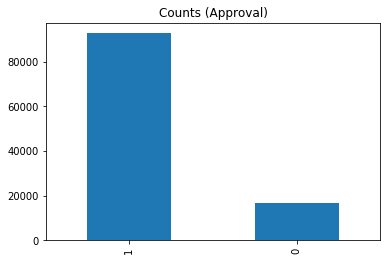

In [28]:
project_data_.approved.value_counts().plot(kind='bar',title='Counts (Approval)')

As we can clearly see that this dataset higly imbalanced towards positive reviews that means most of the posted projects are getting accepted on this platform. But to solve this problem we need to oversample the negative reviews.

In [29]:
'''
#Not required

df1 = project_data_[x_pd.approved==1]
df1 = df1.head(5000)
df1.shape

df0 = project_data_[x_pd.approved==0]
df0 = df0.head(4500)
df0.shape
'''

'\n#Not required\n\ndf1 = project_data_[x_pd.approved==1]\ndf1 = df1.head(5000)\ndf1.shape\n\ndf0 = project_data_[x_pd.approved==0]\ndf0 = df0.head(4500)\ndf0.shape\n'

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = None,None,None,None # clearing the variables
# splitting of train and test data with 80:20 ratio

x_train,x_test,y_train,y_test = train_test_split(project_data_.iloc[:,:project_data_.shape[1]-1],project_data_.approved,test_size=.2,stratify=project_data_.approved)
#X_train,X_cv,y_train,y_cv = train_test_split(X_traincv,y_traincv,test_size=.2,stratify=y_traincv)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=.2,stratify=y_train)


print("Train Data shape : ",x_train.shape, y_train.shape)
print("Cross Validation Data shape :", x_cv.shape, y_cv.shape)
print("Test Data shape :", x_test.shape, y_test.shape)

print("="*100)


Train Data shape :  (69916, 9) (69916,)
Cross Validation Data shape : (17480, 9) (17480,)
Test Data shape : (21849, 9) (21849,)


In [31]:
# With stratify = class label

print("x train distribution = \n", y_train.value_counts())
print("x cv distribution = \n", y_cv.value_counts())
print("x test distribution = \n", y_test.value_counts())

x train distribution = 
 1    59329
0    10587
Name: approved, dtype: int64
x cv distribution = 
 1    14833
0     2647
Name: approved, dtype: int64
x test distribution = 
 1    18541
0     3308
Name: approved, dtype: int64


In [32]:
x_train.head(3)

,teacher_prefix,school_state,project_grade_category,clean_categories,clean_subcategories,teacher_number_of_previously_posted_projects,price,essay,title
62776,Mrs.,FL,Grades PreK-2,Literacy_Language Math_Science,Literacy Mathematics,3,106.16,students awesome individuals title 1 school ti...,need tech knowledgey first grade
30259,Mrs.,IL,Grades 3-5,Math_Science Music_Arts,EnvironmentalScience VisualArts,9,357.20,4th grade students artists scientists readers ...,art science reading math
54815,Ms.,CA,Grades PreK-2,Math_Science AppliedLearning,AppliedSciences EarlyDevelopment,133,503.14,students come diverse ethnic racial background...,sensory play


## **Functions Declaration:**

Declaration of functions for which is further used in computational process like 
* Vectorization
* Hyperparamater Tuning
* Model Generalisation score on Test Data 
* Printing Dimenionality info of input matrix list
* Retrive the vocabulary words for vectorization purposes

In [33]:
def retreive_vocab(_data=None):
    ls = []
    for word in _data:
        if len(word) != 1:
            for w in word.split():
                ls.append(w)
        else:
            ls.append(word)
    return list(set(ls))

In [34]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors.dms', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [35]:
def compute_avg_w2v(_text,w2v_model_words = glove_words):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(_text): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in w2v_model_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
        
    return avg_w2v_vectors

In [36]:
def compute_tfidf_w2v(tfidf_model,_text,w2v_model_words = glove_words):
    # we are converting a dictionary with word as a key, and the idf as a value
    idf_value = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in w2v_model_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and 
                #the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = idf_value[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

        print(len(tfidf_w2v_vectors))
        print(len(tfidf_w2v_vectors[0]))
        return tfidf_w2v_vectors

In [37]:
# Defining a function to compute BOW, TFIDF and Word2Vec 

def vectorize_text(encoding_type=None,**kwargs):
    # Validation for proper argument names
    try:
        checklist = ['test_text','cv_text','train_text']
        for k,v in kwargs.items():
            if k in checklist:
                checklist.remove(k)
        if not checklist:
            # do nothing
            pass
        else:
            raise ValueError("You haven't passed the matrices in the described format, please use names as test_text,cv_text,train_text")
    except ValueError as e:
        print("Error : ", e)
            
    text_train = kwargs['train_text']
    text_cv = kwargs['cv_text']
    text_test = kwargs['test_text']
    
    if "BOW" in encoding_type.upper():
        #Compute BOW
        # We are considering only the words which appeared in at least 10 documents(rows or projects).
        vectorizer = CountVectorizer(min_df=10,max_features=3000)
        vectorizer.fit(text_train)
        return vectorizer.transform(text_train),vectorizer.transform(text_cv),vectorizer.transform(text_test)
    
    elif "TFIDF" in encoding_type.upper():
        #Compute TFIDF
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(min_df=10,max_features=3000)
        vectorizer.fit(text_train)
        return vectorizer.transform(text_train),vectorizer.transform(text_cv),vectorizer.transform(text_test)
    
    elif "AVGW2V" in encoding_type.upper():
        # compute average word2vec for each review.
        return np.array(compute_avg_w2v(_text = text_train)),np.array(compute_avg_w2v(_text = text_cv)),np.array(compute_avg_w2v(_text = text_test)) 
        
    
    elif "TFIDFW2V" in encoding_type.upper():
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(min_df=10,max_features=3000)
        vectorizer.fit(text_train)
        return np.array(compute_tfidf_w2v(tfidf_model=vectorizer,_text = text_train)),np.array(compute_tfidf_w2v(tfidf_model = vectorizer,_text = text_cv)),np.array(compute_tfidf_w2v(tfidf_model = vectorizer,_text = text_test))
    
    else:
        raise ValueError('Please give the encoding type from the following: BOW, TFIDF, AVGW2V,TFIDFW2V')
        
        

In [38]:
def _hypertuning(x_train,y_train,x_cv,y_cv,tune_type):
  K = [1,5,9,11,15,21,27,31,37,41,45,47,51]
  from sklearn.neighbors import KNeighborsClassifier

  if tune_type.lower() == 'custom':
    
    from sklearn.metrics import roc_auc_score
    
    #y_train_pred = []
    train_auc_score = []
    cv_auc_score = []
    
    for i in K:
      y_train_pred = []
      y_cv_pred = []
      neigh = KNeighborsClassifier(n_neighbors = i,n_jobs=4)
      neigh.fit(x_train,y_train)

# return value of predict_proba : array of shape = [n_samples, n_classes], or a list of n_outputs
      for num in range(0,x_train.shape[0],1000):
        y_train_pred.extend(neigh.predict_proba(x_train[num:num+1000])[:,1]) #[: = selecting all rows,1 = selecting all class probabilities for Y=1 ]
      for num in range(0,x_cv.shape[0],1000):
        y_cv_pred.extend(neigh.predict_proba(x_cv[num:num+1000])[:,1]) 
      #import pdb
      #pdb.set_trace()
      train_auc_score.append(roc_auc_score(y_train,y_train_pred))
      cv_auc_score.append(roc_auc_score(y_cv,y_cv_pred))
        
    plt.plot(K, train_auc_score, label='Train AUC')
    plt.scatter(K,train_auc_score)
    plt.plot(K, cv_auc_score, label='CV AUC')
    plt.scatter(K,cv_auc_score)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
      
      
  elif tune_type.lower() == 'gridsearch':
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    from sklearn.model_selection import GridSearchCV

    neigh = KNeighborsClassifier(n_jobs=4)
    parameters = {'n_neighbors':[1, 5, 10, 15, 19 , 21, 31, 41, 51]}
    clf = GridSearchCV(neigh, parameters, cv=10, scoring='roc_auc',n_jobs=-1,return_train_score=True) #cv param is K in K-Fold cross validation
    clf.fit(x_train, y_train)
  
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']

    plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
      # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
      # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange') 
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
      
    
            
            

In [39]:
def model_gen_score(x_train,y_train,x_test,y_test,best_k):
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import confusion_matrix
    from sklearn.neighbors import KNeighborsClassifier

    neigh = KNeighborsClassifier(n_neighbors=best_k,n_jobs=4)
    neigh.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    y_train_pred_prob = []
    y_train_pred = []
    y_test_pred_prob = []
    y_test_pred = []

    for num in range(0,x_train.shape[0],1000):
      y_train_pred_prob.extend(neigh.predict_proba(x_train[num:num+1000])[:,1])
      y_train_pred.extend(neigh.predict(x_train[num:num+1000]))#[: = selecting all rows,1 = selecting all class probabilities for Y=1 ]
    for num in range(0,x_test.shape[0],1000):
      y_test_pred_prob.extend(neigh.predict_proba(x_test[num:num+1000])[:,1])
      y_test_pred.extend(neigh.predict(x_test[num:num+1000]))
      

     
    train_fpr, train_tpr, thresholds = roc_curve(y_true=y_train,y_score=y_train_pred_prob)
    test_fpr, test_tpr, thresholds = roc_curve(y_true=y_test,y_score=y_test_pred_prob)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.scatter(train_fpr, train_tpr)
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.scatter(test_fpr, test_tpr)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
   
      
    print("="*100)
    print("Train confusion matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print("Test confusion matrix")
    print(confusion_matrix(y_test, y_test_pred))
    return (auc(train_fpr, train_tpr),auc(test_fpr, test_tpr))

In [40]:
def print_dimension_info(_obj,_name):
  data_list= ['Training count : ','Cross Validation count : ','Test count : '] * len(_obj)
  col_num = []
  row_num = list()
  for i in _obj:
    row_num.append(i.shape[0])
    col_num.append(i.shape[1])
  print("The Values for : ", _name)
  print("\nRow Values are : ",list(zip(data_list,row_num)))
  print("\nColumn Values are : ",list(zip(data_list,col_num)))
  print("\nType of matrices: ",[type(x) for x in _obj])
  print("*"*100)

In [41]:

def one_hot_encoder(df_col_train,df_col_cv,df_col_test,vocab=None,case=False,_bin=True):
  encoder_obj = CountVectorizer(vocabulary = vocab,lowercase=case,binary=_bin)
  encoder_obj.fit(df_col_train)
  print("features are : \n",encoder_obj.get_feature_names())
  return encoder_obj.transform(df_col_train.values),encoder_obj.transform(df_col_cv.values),encoder_obj.transform(df_col_test.values)
    

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [43]:
# Vectorizing the teacher prefix input
x_train_tp,x_cv_tp,x_test_tp = one_hot_encoder(df_col_train=x_train['teacher_prefix'],df_col_cv=x_cv['teacher_prefix'],df_col_test=x_test['teacher_prefix'])
                                              

features are : 
 ['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']


In [44]:
# vectorizing the school state column
x_train_ss,x_cv_ss,x_test_ss = one_hot_encoder(df_col_train=x_train['school_state'],df_col_cv=x_cv['school_state'],df_col_test=x_test['school_state'])

features are : 
 ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [45]:
# Vectorizing the project_grade_category
x_train_pgc,x_cv_pgc,x_test_pgc = one_hot_encoder(df_col_train=x_train['project_grade_category'],df_col_cv=x_cv['project_grade_category'],\
                                                  df_col_test=x_test['project_grade_category'],vocab=list(x_train['project_grade_category'].unique()))


features are : 
 ['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12']


In [46]:
# Vectorizing the project subject category
x_train_cat,x_cv_cat,x_test_cat = one_hot_encoder(df_col_train=x_train['clean_categories'],df_col_cv=x_cv['clean_categories'],\
                                                  df_col_test=x_test['clean_categories'],vocab=retreive_vocab(_data=x_train['clean_categories'].values))



features are : 
 ['Warmth', 'Music_Arts', 'Care_Hunger', 'Math_Science', 'SpecialNeeds', 'History_Civics', 'Literacy_Language', 'AppliedLearning', 'Health_Sports']


In [47]:
# Vectorizing the project subject sub category
x_train_sub,x_cv_sub,x_test_sub = one_hot_encoder(df_col_train=x_train['clean_subcategories'],df_col_cv=x_cv['clean_subcategories'],\
                                                  df_col_test=x_test['clean_subcategories'],vocab=retreive_vocab(_data=x_train['clean_subcategories'].values))

features are : 
 ['ParentInvolvement', 'Literature_Writing', 'NutritionEducation', 'PerformingArts', 'CharacterEducation', 'Literacy', 'Mathematics', 'SpecialNeeds', 'College_CareerPrep', 'Extracurricular', 'ESL', 'Other', 'FinancialLiteracy', 'Warmth', 'Economics', 'EarlyDevelopment', 'Health_Wellness', 'Gym_Fitness', 'Care_Hunger', 'SocialSciences', 'Health_LifeScience', 'EnvironmentalScience', 'History_Geography', 'CommunityService', 'Civics_Government', 'VisualArts', 'Music', 'TeamSports', 'AppliedSciences', 'ForeignLanguages']


In [48]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_train_price_std = price_scalar.transform(x_train['price'].values.reshape(-1, 1))
x_cv_price_std = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))
x_test_price_std = price_scalar.transform(x_test['price'].values.reshape(-1, 1))

Mean : 298.12522469820925, Standard deviation : 368.3583510782077


In [49]:
# we will be doing the standardization of teacher_number_of_previously_posted_projects also.
teacher_pp_count = StandardScaler()
teacher_pp_count.fit(x_train.teacher_number_of_previously_posted_projects.values.reshape(-1,1))
print(f"Mean : {teacher_pp_count.mean_[0]}, Standard deviation : {np.sqrt(teacher_pp_count.var_[0])}")

x_train_pp_count_std = teacher_pp_count.transform(x_train.teacher_number_of_previously_posted_projects.values.reshape(-1,1))
x_cv_pp_count_std = teacher_pp_count.transform(x_cv.teacher_number_of_previously_posted_projects.values.reshape(-1,1))
x_test_pp_count_std = teacher_pp_count.transform(x_test.teacher_number_of_previously_posted_projects.values.reshape(-1,1))



Mean : 11.112306196006637, Standard deviation : 27.839524692961234


In [50]:
print_dimension_info(_obj=[x_train_tp,x_cv_tp,x_test_tp],_name='Teacher Prefix')
print_dimension_info(_obj=[x_train_ss,x_cv_ss,x_test_ss],_name='Schol State Column')
print_dimension_info(_obj=[x_train_pgc,x_cv_pgc,x_test_pgc],_name = 'Project Grade Category')
print_dimension_info(_obj=[x_train_cat,x_cv_cat,x_test_cat],_name= 'Project subject category')
print_dimension_info(_obj=[x_train_sub,x_cv_sub,x_test_sub],_name= 'Project subject sub category')
print_dimension_info(_obj=[x_train_price_std,x_cv_price_std,x_test_price_std],_name = 'Price')
print_dimension_info(_obj=[x_train_pp_count_std,x_cv_pp_count_std,x_test_pp_count_std],_name='Count of previous project submitted by teacher')


The Values for :  Teacher Prefix

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5), ('Cross Validation count : ', 5), ('Test count : ', 5)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
The Values for :  Schol State Column

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 51), ('Cross Validation count : ', 51), ('Test count : ', 51)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
The Values 

In [51]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_vec = hstack((x_train_tp, x_train_ss, x_train_pgc, x_train_cat, x_train_sub, x_train_price_std, x_train_pp_count_std),format='csr')
x_cv_vec = hstack((x_cv_tp, x_cv_ss, x_cv_pgc, x_cv_cat, x_cv_sub, x_cv_price_std, x_cv_pp_count_std),format='csr')
x_test_vec = hstack((x_test_tp, x_test_ss, x_test_pgc, x_test_cat, x_test_sub, x_test_price_std, x_test_pp_count_std),format='csr')

print_dimension_info(_obj=[x_train_vec,x_cv_vec,x_test_vec],_name='Stacked sparse matrices dimensions')

# hstack only works with matrices. so can't stack text and matrices

The Values for :  Stacked sparse matrices dimensions

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 101), ('Cross Validation count : ', 101), ('Test count : ', 101)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [53]:
x_train.columns

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'clean_categories', 'clean_subcategories',
       'teacher_number_of_previously_posted_projects', 'price', 'essay',
       'title'],
      dtype='object')

In [54]:

bow_title_train,bow_title_cv,bow_title_test = vectorize_text(encoding_type='BOW',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )

print_dimension_info(_obj=[bow_title_train,bow_title_cv,bow_title_test],_name='Dimensions after BOW on Title :')

bow_essay_train,bow_essay_cv,bow_essay_test = vectorize_text(encoding_type='BOW',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )
print_dimension_info(_obj=[bow_essay_train,bow_essay_cv,bow_essay_test],_name='Dimensions after BOW on essay')


The Values for :  Dimensions after BOW on Title :

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 2464), ('Cross Validation count : ', 2464), ('Test count : ', 2464)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
The Values for :  Dimensions after BOW on essay

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 3000), ('Cross Validation count : ', 3000), ('Test count : ', 3000)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
*********************************************************************

In [92]:
# Stacking all the BOW models with existing data frame - 

final_x_train = hstack((x_train_vec,bow_title_train,bow_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,bow_title_cv,bow_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,bow_title_test,bow_essay_test),format='csr')

print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after BOW')

The Values for :  The Final Matrix dimension info after BOW

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5565), ('Cross Validation count : ', 5565), ('Test count : ', 5565)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

**Over Sampling**

As the data set is highly imbalanced, For KNN to work properly we will be oversampling the minority class i.e. negative target variables. However, we won't be having information gain by oversampling and also there will be chance of oversampling. SMOTE won't be helpful as the dataset is highly imbalanced and we can't generate thousands of data points to compensate this. 

In [56]:
'''
def oversample_data(x,y):
  from imblearn.over_sampling import RandomOverSampler
  ros = RandomOverSampler(random_state=0)
  x_train, y_train = ros.fit_resample(x, y)
  from collections import Counter
  print(sorted(Counter(y_train).items()))
  
  return x_train,y_train
'''

'\ndef oversample_data(x,y):\n  from imblearn.over_sampling import RandomOverSampler\n  ros = RandomOverSampler(random_state=0)\n  x_train, y_train = ros.fit_resample(x, y)\n  from collections import Counter\n  print(sorted(Counter(y_train).items()))\n  \n  return x_train,y_train\n'

In [57]:
#x_train_sam,y_train_sam = oversample_data(x=final_x_train[:7000],y=y_train.values[:7000] )

In [58]:
#x_train_sam.shape

In [59]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code. 

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

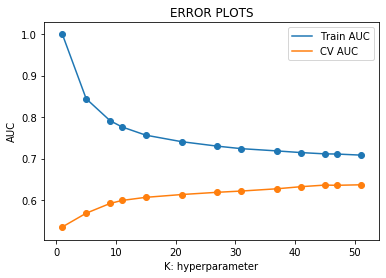

In [60]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

_hypertuning(x_train = final_x_train,y_train=y_train.values,x_cv=final_x_cv,y_cv=y_cv.values,tune_type='custom')




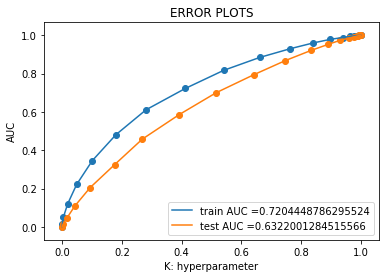

Train confusion matrix
[[   54 10533]
 [   29 59300]]
Test confusion matrix
[[   15  3293]
 [   21 18520]]


In [93]:

bow_k = 35
bow_train_auc,bow_test_auc = model_gen_score(x_train = final_x_train,y_train=y_train.values,\
                                             x_test=final_x_test,y_test=y_test.values,best_k=bow_k)
                                             

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [62]:
# Please write all the code with proper documentation

tfidf_essay_train,tfidf_essay_cv,tfidf_essay_test = vectorize_text(encoding_type='TFIDF',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )

In [63]:
# Please write all the code with proper documentation

tfidf_title_train,tfidf_title_cv,tfidf_title_test = vectorize_text(encoding_type='TFIDF',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )

In [94]:
final_x_train = hstack((x_train_vec,tfidf_title_train,tfidf_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,tfidf_title_cv,tfidf_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,tfidf_title_test,tfidf_essay_test),format='csr')
print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after TFIDF')

The Values for :  The Final Matrix dimension info after TFIDF

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5565), ('Cross Validation count : ', 5565), ('Test count : ', 5565)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


In [65]:
#x_train_sam,y_train_sam = oversample_data(x=final_x_train[:7000],y=y_train.values[:7000] )

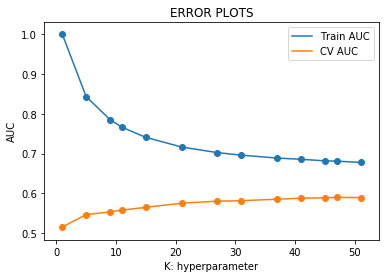

In [66]:
# Hypertuning the parameters for cross validation

_hypertuning(x_train = final_x_train,y_train=y_train.values,x_cv=final_x_cv,y_cv=y_cv.values,tune_type='custom')


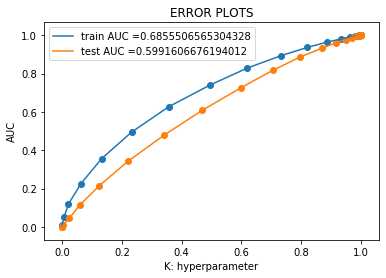

Train confusion matrix
[[    4 10583]
 [    2 59327]]
Test confusion matrix
[[    1  3307]
 [    2 18539]]


In [96]:
# Testing the data on Test data to check generalization of this Model

tfidf_k = 41
tfidf_train_auc,tfidf_test_auc = model_gen_score(x_train = final_x_train,\
                                                 y_train=y_train.values,x_test=final_x_test,y_test=y_test.values,best_k=tfidf_k)
                                                 

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [68]:

# Using the pretrained word2vec glove model 

In [69]:

avgw2v_title_train,avgw2v_title_cv,avgw2v_title_test = vectorize_text(encoding_type='AVGW2V',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )
avgw2v_essay_train,avgw2v_essay_cv,avgw2v_essay_test = vectorize_text(encoding_type='AVGW2V',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )


  0%|          | 0/17480 [00:00<?, ?it/s]

69916
300


 26%|██▋       | 5767/21849 [00:00<00:00, 57664.83it/s]

17480
300


  0%|          | 295/69916 [00:00<00:23, 2941.85it/s]

21849
300


  2%|▏         | 307/17480 [00:00<00:05, 3064.58it/s]

69916
300


  1%|▏         | 293/21849 [00:00<00:07, 2924.61it/s]

17480
300


100%|██████████| 21849/21849 [00:07<00:00, 3013.59it/s]

21849
300


In [70]:
print_dimension_info(_obj=[avgw2v_title_train,avgw2v_title_cv,avgw2v_title_test,avgw2v_essay_train,avgw2v_essay_cv,avgw2v_essay_test],_name='Average W2V dim')

The Values for :  Average W2V dim

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849), ('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 300), ('Cross Validation count : ', 300), ('Test count : ', 300), ('Training count : ', 300), ('Cross Validation count : ', 300), ('Test count : ', 300)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [98]:
# This time we have np.hstack because we are not dealing with the sparse matrices.

final_x_train = np.hstack((x_train_vec.todense(),avgw2v_title_train,avgw2v_essay_train))
final_x_cv = np.hstack((x_cv_vec.todense(),avgw2v_title_cv,avgw2v_essay_cv))
final_x_test = np.hstack((x_test_vec.todense(),avgw2v_title_test,avgw2v_essay_test))
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='The final matrix of AVGW2V')

The Values for :  The final matrix of AVGW2V

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 701), ('Cross Validation count : ', 701), ('Test count : ', 701)]

Type of matrices:  [<class 'numpy.matrix'>, <class 'numpy.matrix'>, <class 'numpy.matrix'>]
****************************************************************************************************


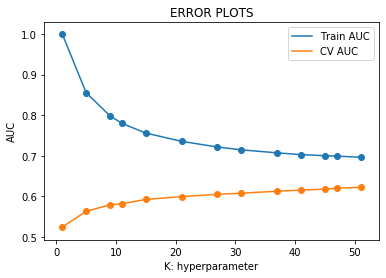

In [72]:
_hypertuning(x_train = final_x_train,y_train=y_train.values,x_cv=final_x_cv,y_cv=y_cv.values,tune_type='custom')


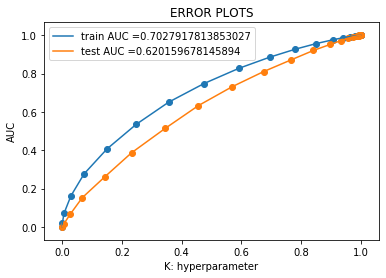

Train confusion matrix
[[   10 10577]
 [    2 59327]]
Test confusion matrix
[[    3  3305]
 [    1 18540]]


In [99]:

avgw2v_k = 41
avgw2v_train_auc,avgw2v_test_auc = model_gen_score(x_train = final_x_train,y_train=y_train.values,\
                                                   x_test=final_x_test,y_test=y_test.values,best_k=avgw2v_k)
                                                   

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [74]:
# Please write all the code with proper documentation

In [75]:

tfidfw2v_title_train,tfidfw2v_title_cv,tfidfw2v_title_test = vectorize_text(encoding_type='TFIDFW2V',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )
tfidfw2v_essay_train,tfidfw2v_essay_cv,tfidfw2v_essay_test = vectorize_text(encoding_type='TFIDFW2V',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )

In [76]:
print_dimension_info(_obj=[tfidfw2v_title_train,tfidfw2v_title_cv,tfidfw2v_title_test,tfidfw2v_essay_train,tfidfw2v_essay_cv,tfidfw2v_essay_test],\
                    _name='TFIDF W2V Dimensions')

The Values for :  TFIDF W2V Dimensions

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849), ('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 2464), ('Cross Validation count : ', 2464), ('Test count : ', 2464), ('Training count : ', 3000), ('Cross Validation count : ', 3000), ('Test count : ', 3000)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


In [100]:


final_x_train = hstack((x_train_vec,tfidfw2v_title_train,tfidfw2v_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,tfidfw2v_title_cv,tfidfw2v_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,tfidfw2v_title_test,tfidfw2v_essay_test),format='csr')
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='TFIDF W2V final data matrix dimension :')

The Values for :  TFIDF W2V final data matrix dimension :

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5565), ('Cross Validation count : ', 5565), ('Test count : ', 5565)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


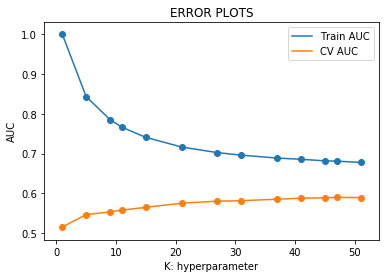

In [78]:
_hypertuning(x_train = final_x_train,y_train=y_train.values,x_cv=final_x_cv,y_cv=y_cv.values,tune_type='custom')


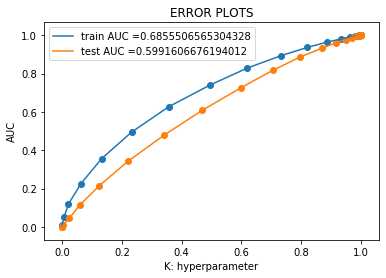

Train confusion matrix
[[    4 10583]
 [    2 59327]]
Test confusion matrix
[[    1  3307]
 [    2 18539]]


In [101]:

tfidfw2v_k = 41
tfidfw2v_train_auc,tfidfw2v_test_auc = model_gen_score(x_train = final_x_train,y_train=y_train.values,x_test=final_x_test,y_test=y_test.values,best_k=tfidfw2v_k)



<h2>2.5 Feature selection with `SelectKBest` </h2>

In [80]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [81]:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
# Normalisation is required as chi2 statistics doesn't work on negative values

from sklearn.preprocessing import MinMaxScaler
norm_price = MinMaxScaler().fit(x_train['price'].values.reshape(-1,1))
norm_teacher = MinMaxScaler().fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


In [82]:
norm_teacher_train = norm_teacher.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
norm_price_train = norm_price.transform(x_train['price'].values.reshape(-1,1))

In [83]:
print(norm_teacher_train.shape)
print(norm_price_train.shape)

(69916, 1)
(69916, 1)


In [84]:
type(norm_teacher_train)

numpy.ndarray

In [102]:
final_x_train = hstack((x_train_vec[:,:-2],norm_price_train,norm_teacher_train,tfidf_title_train,tfidf_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,tfidf_title_cv,tfidf_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,tfidf_title_test,tfidf_essay_test),format='csr')
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='The final dimension of TFIDF matrix for features selection')

The Values for :  The final dimension of TFIDF matrix for features selection

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5565), ('Cross Validation count : ', 5565), ('Test count : ', 5565)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


In [103]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
from sklearn.feature_selection import SelectKBest, chi2

chi_selector = SelectKBest(chi2, k=2000).fit(final_x_train, y_train)
x_train_new = chi_selector.transform(final_x_train)
x_train_new.shape

(69916, 2000)

In [104]:
x_cv_new = chi_selector.transform(final_x_cv)
x_cv_new.shape

(17480, 2000)

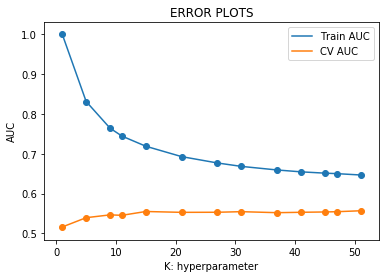

In [105]:
_hypertuning(x_train = x_train_new,y_train=y_train.values,x_cv=chi_selector.transform(final_x_cv),y_cv=y_cv.values,tune_type='custom')



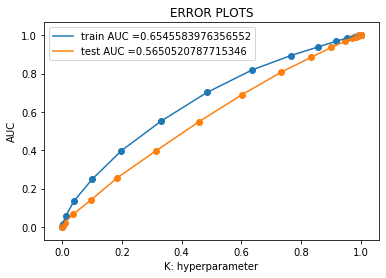

Train confusion matrix
[[    0 10587]
 [    0 59329]]
Test confusion matrix
[[    0  3308]
 [    0 18541]]


In [106]:

kf_k = 41
kfeature_tfidf_train,kfeature_tfidf_test = model_gen_score(x_train = x_train_new,y_train=y_train.values,x_test=chi_selector.transform(final_x_test),y_test=y_test.values,best_k=kf_k)


<h1>3. Conclusions</h1>

In [107]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['Vectorizer','Model','Hyperparameters','TEST AUC']

x.add_row(['BOW','BRUTE',bow_k,bow_test_auc])
x.add_row(['TFIDF','BRUTE',tfidf_k,tfidf_test_auc])
x.add_row(['AVGW2V','BRUTE',avgw2v_k,avgw2v_test_auc])
x.add_row(['TFIDFW2V','BRUTE',tfidfw2v_k,tfidfw2v_test_auc])
x.add_row(['TFIDF 2000 features','BRUTE',kf_k,kfeature_tfidf_test])

print(x)


+---------------------+-------+-----------------+--------------------+
|      Vectorizer     | Model | Hyperparameters |      TEST AUC      |
+---------------------+-------+-----------------+--------------------+
|         BOW         | BRUTE |        35       | 0.6322001284515566 |
|        TFIDF        | BRUTE |        41       | 0.5991606676194012 |
|        AVGW2V       | BRUTE |        41       | 0.620159678145894  |
|       TFIDFW2V      | BRUTE |        41       | 0.5991606676194012 |
| TFIDF 2000 features | BRUTE |        41       | 0.5650520787715346 |
+---------------------+-------+-----------------+--------------------+
